In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


https://www.kaggle.com/tasneemabdulrahim/tips-dataset

Text(0.5, 1.0, 'Heatmap of the Dataset')

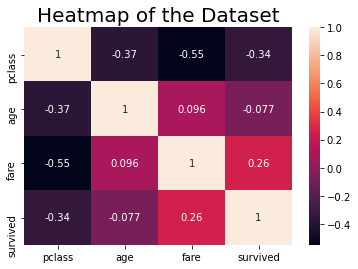

In [3]:
t_df = sns.load_dataset('titanic')
t_df[['pclass','age','fare','survived']].corr()
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [4]:
table = t_df.pivot_table(index=['sex'],columns=['class'],values=['survived'],
                        aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

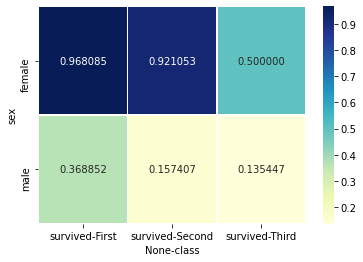

In [6]:
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu',
           linewidth=.5,
           cbar=True)